In [24]:
import pandas as pd
import numpy as np

In [25]:
# 파일 불러오기
df = pd.read_excel("../데이터자료/Join_data.xlsx", index_col = 0)    
df = df.set_index("DateTime")

# 대비 계산
df['대비_irs_1Y'] = df['1Y_Mid_irs'] - df['1Y_Mid_irs'].shift(1) 
df['대비_irs_2Y'] = df['2Y_Mid_irs'] - df['2Y_Mid_irs'].shift(1) 
df['대비_irs_3Y'] = df['3Y_Mid_irs'] - df['3Y_Mid_irs'].shift(1) 
df['대비_irs_5Y'] = df['5Y_Mid_irs'] - df['5Y_Mid_irs'].shift(1) 
df['대비_irs_10Y'] = df['10Y_Mid_irs'] - df['10Y_Mid_irs'].shift(1) 

df['대비_crs_1Y'] = df['1Y_Mid_crs'] - df['1Y_Mid_crs'].shift(1)
df['대비_crs_2Y'] = df['2Y_Mid_crs'] - df['2Y_Mid_crs'].shift(1)
df['대비_crs_3Y'] = df['3Y_Mid_crs'] - df['3Y_Mid_crs'].shift(1)
df['대비_crs_5Y'] = df['5Y_Mid_crs'] - df['5Y_Mid_crs'].shift(1)
df['대비_crs_10Y'] = df['10Y_Mid_crs'] - df['10Y_Mid_crs'].shift(1)

df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['대비_ndf'] = df['Mid_ndf']-df['Mid_ndf'].shift(1)
df['스왑포인트_1M'] = df["M1_스왑포인트"]/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex', '종가_NDF_차이' ]] 

# 결측치 제거
df_1 = df_1.dropna()                        

In [26]:
x = df_1[[ '대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '스왑포인트_1M', '전일종가_ex', 
           '종가_NDF_차이'  ]]
y = df_1["종가_ex"]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28688\1797086163.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.feature = x.columns


,대비_irs_1Y,대비_irs_2Y,대비_irs_3Y,대비_irs_5Y,대비_irs_10Y,대비_crs_1Y,대비_crs_2Y,대비_crs_3Y,대비_crs_5Y,대비_crs_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,스왑포인트_1M,전일종가_ex,종가_NDF_차이
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-02,-0.847862,-1.217081,-0.935854,-1.045679,-1.009126,-0.205655,0.707360,0.905480,0.926463,0.826282,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.625160,1.909409,-0.149841,-1.648743
2012-08-03,-0.847862,-0.731532,-0.562378,-0.628002,-0.403231,-0.205655,-0.364505,-0.463176,-1.872849,-3.115790,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.125723,1.818881,-0.056232,-1.366022
2012-08-06,0.560374,0.482340,0.371312,0.416191,0.202663,-0.003373,-0.602697,-0.691285,-0.939745,-0.833538,0.563566,0.160261,0.000879,0.000209,0.107465,0.123996,1.818881,-0.000426,1.602547
2012-08-07,0.278727,-0.003209,-0.002164,0.207352,0.404628,0.401191,0.350072,-0.006957,-1.639573,-1.663448,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.125723,1.909409,-0.104837,0.118263
2012-08-08,0.278727,0.482340,0.371312,0.416191,0.606592,0.198909,-0.007216,-0.006957,-0.473193,-0.833538,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.125723,1.818881,-0.108437,-0.223358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129510,-1.945404,-1.309330,-1.881032,-2.220914,-1.621628,-2.150945,-1.603722,-2.572677,-2.285880,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.625160,-0.896960,3.207485,0.860405
2022-07-26,-0.284568,-0.488757,-0.562378,-0.628002,-0.605196,0.198909,-0.721793,-0.691285,-0.473193,-0.418583,0.563566,-0.485246,-0.539435,-0.770625,0.107465,-0.000863,-0.987488,3.220086,0.754385
2022-07-27,-0.284568,-1.217081,-1.122592,-1.254517,-1.211091,0.198909,-0.245409,-0.235067,-0.239917,-0.211106,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,-0.125723,-0.851696,3.110275,-0.564979


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.draw()
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.draw()
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.draw()
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.draw()
c:\Users\tlsdm\AppData\Local\Programs\Pyt

<AxesSubplot:>

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:15

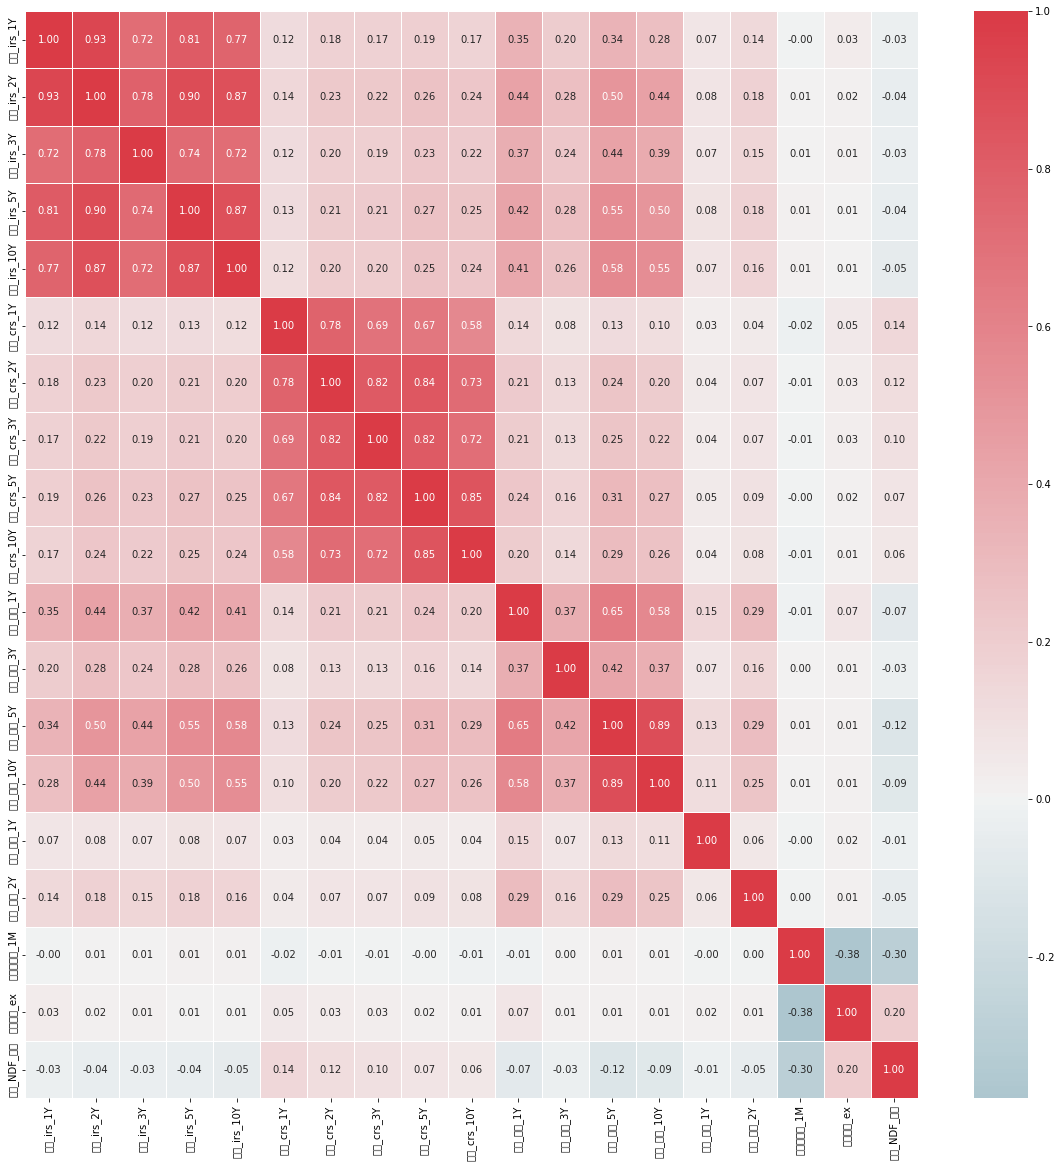

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.960192   대비_irs_1Y
1    19.501070   대비_irs_2Y
2     2.662512   대비_irs_3Y
3     6.474121   대비_irs_5Y
4     5.880995  대비_irs_10Y
5     2.663434   대비_crs_1Y
6     5.272150   대비_crs_2Y
7     3.831861   대비_crs_3Y
8     6.698546   대비_crs_5Y
9     3.716729  대비_crs_10Y
10    1.926839    대비_국고_1Y
11    1.254279    대비_국고_3Y
12    6.299324    대비_국고_5Y
13    5.058509   대비_국고_10Y
14    1.025239    대비_통안_1Y
15    1.115967    대비_통안_2Y
16    1.248050    스왑포인트_1M
17    1.192603     전일종가_ex
18    1.162388   종가_NDF_차이


In [29]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.453e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:49:04   Log-Likelihood:                -6907.2
No. Observations:                2459   AIC:                         1.385e+04
Df Residuals:                    2439   BIC:                         1.397e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.734    1135.053
대비_irs_1Y      0.0320      0.257      0.125      0.901      -0.471       0.535
대비_irs_2Y      0.4368      0.359      1.217      0.224      -0.267       1.141
대비_irs_3Y      0.0617      0.133      0.465      0.642      -0.198       0.322
대비_irs_5Y     -0.0227      0.207     -0.110      0.913      -0.428       0.383
대비_irs_10Y    -0.5280      0.197     -2.678      0.007      -0.915      -0.141
대비_crs_1Y     -0.6881      0.133     -5.186      0.000      -0.948      -0.428
대비_crs_2Y      0.0527      0.187      0.283      0.778      -0.313       0.419
대비_crs_3Y     -0.2957      0.159     -1.858      0.063      -0.608       0.016
대비_crs_5Y     -0.3172      0.210     -1.508      0.132      -0.730       0.095
대비_crs_10Y     0.1188      0.157      0.758      0.448      -0.189       0.426
대비_국고_1Y      -0.0149      0.113     -0.132      0.895      -0.236       0.206
대비_국고_3Y      -0.1732      0.091     -1.903      0.057      -0.352       0.005
대비_국고_5Y       0.2574      0.204      1.262      0.207      -0.143       0.658
대비_국고_10Y     -0.0071      0.183     -0.039      0.969      -0.366       0.351
대비_통안_1Y      -0.0048      0.082     -0.058      0.954      -0.166       0.157
대비_통안_2Y       0.0294      0.086      0.342      0.732      -0.139       0.198
스왑포인트_1M      -1.1729      0.091    -12.914      0.000      -1.351      -0.995
전일종가_ex       55.7384      0.089    627.817      0.000      55.564      55.912
종가_NDF_차이     -3.9527      0.088    -45.097      0.000      -4.125      -3.781
==============================================================================
Omnibus:                      208.876   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              895.344
Skew:                           0.305   Prob(JB):                    3.79e-195
Kurtosis:                       5.892   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x_scaled.drop(['대비_irs_2Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.932627   대비_irs_1Y
1     2.552008   대비_irs_3Y
2     5.807206   대비_irs_5Y
3     5.225154  대비_irs_10Y
4     2.660685   대비_crs_1Y
5     5.260811   대비_crs_2Y
6     3.829372   대비_crs_3Y
7     6.693347   대비_crs_5Y
8     3.716562  대비_crs_10Y
9     1.915930    대비_국고_1Y
10    1.248234    대비_국고_3Y
11    6.212802    대비_국고_5Y
12    5.044617   대비_국고_10Y
13    1.024881    대비_통안_1Y
14    1.115274    대비_통안_2Y
15    1.248036    스왑포인트_1M
16    1.191889     전일종가_ex
17    1.162241   종가_NDF_차이


In [31]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.589e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:49:05   Log-Likelihood:                -6908.0
No. Observations:                2459   AIC:                         1.385e+04
Df Residuals:                    2440   BIC:                         1.396e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.734    1135.053
대비_irs_1Y      0.2748      0.161      1.704      0.088      -0.041       0.591
대비_irs_3Y      0.0945      0.130      0.728      0.467      -0.160       0.349
대비_irs_5Y      0.0581      0.196      0.296      0.767      -0.326       0.442
대비_irs_10Y    -0.4479      0.186     -2.410      0.016      -0.812      -0.083
대비_crs_1Y     -0.6933      0.133     -5.228      0.000      -0.953      -0.433
대비_crs_2Y      0.0633      0.186      0.339      0.734      -0.302       0.429
대비_crs_3Y     -0.3006      0.159     -1.890      0.059      -0.613       0.011
대비_crs_5Y     -0.3101      0.210     -1.474      0.141      -0.723       0.102
대비_crs_10Y     0.1201      0.157      0.766      0.444      -0.187       0.427
대비_국고_1Y      -0.0046      0.113     -0.041      0.967      -0.225       0.216
대비_국고_3Y      -0.1655      0.091     -1.822      0.069      -0.344       0.013
대비_국고_5Y       0.2865      0.203      1.414      0.158      -0.111       0.684
대비_국고_10Y     -0.0188      0.183     -0.103      0.918      -0.377       0.339
대비_통안_1Y      -0.0067      0.082     -0.081      0.936      -0.168       0.155
대비_통안_2Y       0.0320      0.086      0.373      0.709      -0.136       0.200
스왑포인트_1M      -1.1725      0.091    -12.909      0.000      -1.351      -0.994
전일종가_ex       55.7357      0.089    627.913      0.000      55.562      55.910
종가_NDF_차이     -3.9539      0.088    -45.109      0.000      -4.126      -3.782
==============================================================================
Omnibus:                      211.766   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.395
Skew:                           0.311   Prob(JB):                    4.56e-199
Kurtosis:                       5.920   Cond. No.                         7.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
x_scaled.drop(['대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.931683   대비_irs_1Y
1     2.551936   대비_irs_3Y
2     5.807205   대비_irs_5Y
3     5.224515  대비_irs_10Y
4     2.660670   대비_crs_1Y
5     5.260766   대비_crs_2Y
6     3.829352   대비_crs_3Y
7     6.693343   대비_crs_5Y
8     3.716561  대비_crs_10Y
9     1.904686    대비_국고_1Y
10    1.248190    대비_국고_3Y
11    6.209501    대비_국고_5Y
12    5.044596   대비_국고_10Y
13    1.115171    대비_통안_2Y
14    1.248023    스왑포인트_1M
15    1.191802     전일종가_ex
16    1.162241   종가_NDF_차이


In [33]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.742e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:49:06   Log-Likelihood:                -6908.0
No. Observations:                2459   AIC:                         1.385e+04
Df Residuals:                    2441   BIC:                         1.396e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.734    1135.053
대비_irs_1Y      0.2746      0.161      1.704      0.089      -0.041       0.591
대비_irs_3Y      0.0946      0.130      0.728      0.466      -0.160       0.349
대비_irs_5Y      0.0581      0.196      0.297      0.767      -0.326       0.442
대비_irs_10Y    -0.4477      0.186     -2.410      0.016      -0.812      -0.083
대비_crs_1Y     -0.6933      0.133     -5.229      0.000      -0.953      -0.433
대비_crs_2Y      0.0632      0.186      0.339      0.735      -0.302       0.429
대비_crs_3Y     -0.3006      0.159     -1.890      0.059      -0.613       0.011
대비_crs_5Y     -0.3101      0.210     -1.474      0.140      -0.722       0.102
대비_crs_10Y     0.1201      0.157      0.766      0.443      -0.187       0.427
대비_국고_1Y      -0.0053      0.112     -0.047      0.962      -0.225       0.215
대비_국고_3Y      -0.1656      0.091     -1.823      0.068      -0.344       0.013
대비_국고_5Y       0.2862      0.203      1.413      0.158      -0.111       0.683
대비_국고_10Y     -0.0188      0.183     -0.103      0.918      -0.377       0.339
대비_통안_2Y       0.0319      0.086      0.372      0.710      -0.136       0.200
스왑포인트_1M      -1.1725      0.091    -12.912      0.000      -1.351      -0.994
전일종가_ex       55.7357      0.089    628.063      0.000      55.562      55.910
종가_NDF_차이     -3.9539      0.088    -45.118      0.000      -4.126      -3.782
==============================================================================
Omnibus:                      211.766   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.490
Skew:                           0.311   Prob(JB):                    4.35e-199
Kurtosis:                       5.921   Cond. No.                         7.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
x_scaled.drop(['대비_irs_3Y', '대비_irs_5Y','대비_통안_2Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     2.809873   대비_irs_1Y
1     3.643651  대비_irs_10Y
2     2.655681   대비_crs_1Y
3     5.258811   대비_crs_2Y
4     3.828086   대비_crs_3Y
5     6.683120   대비_crs_5Y
6     3.712837  대비_crs_10Y
7     1.869913    대비_국고_1Y
8     1.245958    대비_국고_3Y
9     6.114840    대비_국고_5Y
10    5.043795   대비_국고_10Y
11    1.247862    스왑포인트_1M
12    1.191190     전일종가_ex
13    1.161078   종가_NDF_차이


In [35]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.333e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:49:06   Log-Likelihood:                -6908.4
No. Observations:                2459   AIC:                         1.385e+04
Df Residuals:                    2444   BIC:                         1.393e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
대비_irs_1Y      0.3392      0.136      2.491      0.013       0.072       0.606
대비_irs_10Y    -0.3897      0.155     -2.513      0.012      -0.694      -0.086
대비_crs_1Y     -0.6974      0.132     -5.267      0.000      -0.957      -0.438
대비_crs_2Y      0.0644      0.186      0.345      0.730      -0.301       0.430
대비_crs_3Y     -0.3032      0.159     -1.907      0.057      -0.615       0.009
대비_crs_5Y     -0.3036      0.210     -1.445      0.148      -0.716       0.108
대비_crs_10Y     0.1234      0.157      0.788      0.431      -0.184       0.430
대비_국고_1Y       0.0043      0.111      0.039      0.969      -0.214       0.222
대비_국고_3Y      -0.1623      0.091     -1.789      0.074      -0.340       0.016
대비_국고_5Y       0.3031      0.201      1.508      0.132      -0.091       0.697
대비_국고_10Y     -0.0184      0.182     -0.101      0.920      -0.376       0.339
스왑포인트_1M      -1.1721      0.091    -12.913      0.000      -1.350      -0.994
전일종가_ex       55.7341      0.089    628.484      0.000      55.560      55.908
종가_NDF_차이     -3.9531      0.088    -45.151      0.000      -4.125      -3.781
==============================================================================
Omnibus:                      212.515   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              922.903
Skew:                           0.310   Prob(JB):                    3.93e-201
Kurtosis:                       5.937   Cond. No.                         6.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
x_scaled.drop(['대비_crs_2Y', '대비_국고_1Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.892e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:49:06   Log-Likelihood:                -6908.5
No. Observations:                2459   AIC:                         1.384e+04
Df Residuals:                    2446   BIC:                         1.392e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
대비_irs_1Y      0.3422      0.133      2.565      0.010       0.081       0.604
대비_irs_10Y    -0.3921      0.154     -2.549      0.011      -0.694      -0.090
대비_crs_1Y     -0.6762      0.118     -5.754      0.000      -0.907      -0.446
대비_crs_3Y     -0.2873      0.152     -1.887      0.059      -0.586       0.011
대비_crs_5Y     -0.2771      0.196     -1.417      0.157      -0.661       0.107
대비_crs_10Y     0.1236      0.156      0.790      0.429      -0.183       0.430
대비_국고_3Y      -0.1616      0.090     -1.798      0.072      -0.338       0.015
대비_국고_5Y       0.3073      0.191      1.611      0.107      -0.067       0.681
대비_국고_10Y     -0.0192      0.182     -0.106      0.916      -0.377       0.338
스왑포인트_1M      -1.1716      0.091    -12.914      0.000      -1.349      -0.994
전일종가_ex       55.7345      0.088    630.551      0.000      55.561      55.908
종가_NDF_차이     -3.9520      0.087    -45.199      0.000      -4.123      -3.781
==============================================================================
Omnibus:                      211.519   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.740
Skew:                           0.308   Prob(JB):                    8.56e-200
Kurtosis:                       5.927   Cond. No.                         6.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
x_scaled.drop(['대비_crs_10Y', '대비_국고_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.672e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:49:06   Log-Likelihood:                -6908.8
No. Observations:                2459   AIC:                         1.384e+04
Df Residuals:                    2448   BIC:                         1.390e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
대비_irs_1Y      0.3418      0.131      2.601      0.009       0.084       0.599
대비_irs_10Y    -0.3913      0.151     -2.589      0.010      -0.688      -0.095
대비_crs_1Y     -0.6744      0.117     -5.742      0.000      -0.905      -0.444
대비_crs_3Y     -0.2813      0.152     -1.851      0.064      -0.579       0.017
대비_crs_5Y     -0.1788      0.151     -1.184      0.237      -0.475       0.117
대비_국고_3Y      -0.1624      0.090     -1.808      0.071      -0.339       0.014
대비_국고_5Y       0.2938      0.112      2.628      0.009       0.075       0.513
스왑포인트_1M      -1.1728      0.091    -12.933      0.000      -1.351      -0.995
전일종가_ex       55.7336      0.088    630.774      0.000      55.560      55.907
종가_NDF_차이     -3.9530      0.087    -45.246      0.000      -4.124      -3.782
==============================================================================
Omnibus:                      211.956   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.239
Skew:                           0.310   Prob(JB):                    1.10e-199
Kurtosis:                       5.925   Cond. No.                         4.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x_scaled.drop(['대비_crs_5Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.191e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:49:06   Log-Likelihood:                -6909.5
No. Observations:                2459   AIC:                         1.384e+04
Df Residuals:                    2449   BIC:                         1.390e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
대비_irs_1Y      0.3494      0.131      2.661      0.008       0.092       0.607
대비_irs_10Y    -0.4055      0.151     -2.692      0.007      -0.701      -0.110
대비_crs_1Y     -0.7104      0.113     -6.261      0.000      -0.933      -0.488
대비_crs_3Y     -0.3979      0.116     -3.436      0.001      -0.625      -0.171
대비_국고_3Y      -0.1643      0.090     -1.829      0.068      -0.340       0.012
대비_국고_5Y       0.2781      0.111      2.506      0.012       0.060       0.496
스왑포인트_1M      -1.1721      0.091    -12.925      0.000      -1.350      -0.994
전일종가_ex       55.7357      0.088    630.866      0.000      55.562      55.909
종가_NDF_차이     -3.9523      0.087    -45.235      0.000      -4.124      -3.781
==============================================================================
Omnibus:                      212.792   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              924.214
Skew:                           0.311   Prob(JB):                    2.04e-201
Kurtosis:                       5.938   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
x_scaled.drop(['대비_국고_3Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.834e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:49:07   Log-Likelihood:                -6911.2
No. Observations:                2459   AIC:                         1.384e+04
Df Residuals:                    2450   BIC:                         1.389e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
대비_irs_1Y      0.3313      0.131      2.530      0.011       0.075       0.588
대비_irs_10Y    -0.3942      0.151     -2.618      0.009      -0.690      -0.099
대비_crs_1Y     -0.7120      0.114     -6.272      0.000      -0.935      -0.489
대비_crs_3Y     -0.4001      0.116     -3.454      0.001      -0.627      -0.173
대비_국고_5Y       0.2091      0.104      2.002      0.045       0.004       0.414
스왑포인트_1M      -1.1734      0.091    -12.934      0.000      -1.351      -0.996
전일종가_ex       55.7354      0.088    630.562      0.000      55.562      55.909
종가_NDF_차이     -3.9557      0.087    -45.263      0.000      -4.127      -3.784
==============================================================================
Omnibus:                      211.730   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.319
Skew:                           0.309   Prob(JB):                    1.06e-199
Kurtosis:                       5.926   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
x_scaled.columns

Index(['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_5Y',
       '스왑포인트_1M', '전일종가_ex', '종가_NDF_차이'],
      dtype='object')

In [41]:
df_scaled = pd.concat([x_scaled, y], axis=1)
df_scaled

,대비_irs_1Y,대비_irs_10Y,대비_crs_1Y,대비_crs_3Y,대비_국고_5Y,스왑포인트_1M,전일종가_ex,종가_NDF_차이,종가_ex
DateTime,,,,,,,,,
2012-08-02,-0.847862,-1.009126,-0.205655,0.905480,-1.079749,1.909409,-0.149841,-1.648743,1131.7
2012-08-03,-0.847862,-0.403231,-0.205655,-0.463176,-1.890219,1.818881,-0.056232,-1.366022,1134.8
2012-08-06,0.560374,0.202663,-0.003373,-0.691285,0.000879,1.818881,-0.000426,1.602547,1129.0
2012-08-07,0.278727,0.404628,0.401191,-0.006957,0.000879,1.909409,-0.104837,0.118263,1128.8
2012-08-08,0.278727,0.606592,0.198909,-0.006957,-0.539435,1.818881,-0.108437,-0.223358,1128.3
...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129510,-2.220914,-1.621628,-1.603722,-1.890219,-0.896960,3.207485,0.860405,1313.7
2022-07-26,-0.284568,-0.605196,0.198909,-0.691285,-0.539435,-0.987488,3.220086,0.754385,1307.6
2022-07-27,-0.284568,-1.211091,0.198909,-0.235067,-1.349905,-0.851696,3.110275,-0.564979,1313.3


In [42]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_5Y',
       '스왑포인트_1M', '전일종가_ex', '종가_NDF_차이']
label_cols = ['종가_ex']

In [43]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 1)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1555, 1, 8), (389, 1, 8))

In [44]:
train_feature

array([[[-8.47862468e-01, -1.00912576e+00, -2.05654693e-01, ...,
          1.90940854e+00, -1.49840936e-01, -1.64874272e+00]],

       [[-8.47862468e-01, -4.03231428e-01, -2.05654693e-01, ...,
          1.81888052e+00, -5.62318504e-02, -1.36602186e+00]],

       [[ 5.60373809e-01,  2.02662908e-01, -3.37273697e-03, ...,
          1.81888052e+00, -4.26434230e-04,  1.60254716e+00]],

       ...,

       [[-2.84567957e-01, -4.03231428e-01,  1.41260096e+00, ...,
         -4.89583909e-01,  1.25789569e+00,  7.54384581e-01]],

       [[ 2.78726554e-01,  2.02662908e-01, -6.10218605e-01, ...,
         -3.53791884e-01,  1.18408853e+00, -6.82779784e-01]],

       [[-2.92070151e-03,  6.06592466e-01, -6.10218605e-01, ...,
         -5.34847918e-01,  1.14808503e+00,  4.75824341e-02]]])

In [45]:
test_feature, test_label = make_dataset(test_feature, test_label, 1)
test_feature.shape, test_label.shape

((513, 1, 8), (513, 1))

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일(모델학습을 위한 학습과정 설정단계)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Test Accuracy: %.4f" % model.evaluate(x_valid, y_valid))     

Epoch 1/200
98/98 [==============================] - ETA: 0s - loss: 1265929.5000 - mae: 1123.9852
Epoch 1: val_loss improved from inf to 1268259.12500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 13s 84ms/step - loss: 1265929.5000 - mae: 1123.9852 - val_loss: 1268259.1250 - val_mae: 1125.0901
Epoch 2/200
90/98 [==========================>...] - ETA: 0s - loss: 1264480.1250 - mae: 1123.3442
Epoch 2: val_loss improved from 1268259.12500 to 1266224.50000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 7s 72ms/step - loss: 1264474.3750 - mae: 1123.3379 - val_loss: 1266224.5000 - val_mae: 1124.1865
Epoch 3/200
94/98 [===========================>..] - ETA: 0s - loss: 1261655.7500 - mae: 1122.0759
Epoch 3: val_loss improved from 1266224.50000 to 1262261.00000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 7s 74ms/step -

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 133: invalid start byte

In [ ]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 10))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.grid()
plt.show()